**Installing scikit-plot library**

In [1]:
!pip install scikit-plot


**Importing required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import svm
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Reading the Dataset**

In [3]:
df = pd.read_csv("wineQualityWhites.csv")

**Displaying first 5 rows of dataset**

In [4]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Displaying dataset shape**

In [5]:
df.shape

(4898, 12)

**Displaying dataset column data types**

In [6]:
df.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Displaying descriptive stats from dataseta**

In [7]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Checking missing or null values in the dataset**

In [8]:
# Missing Values
print(df.isna().sum())

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**Displaying correlation between the dataset features**

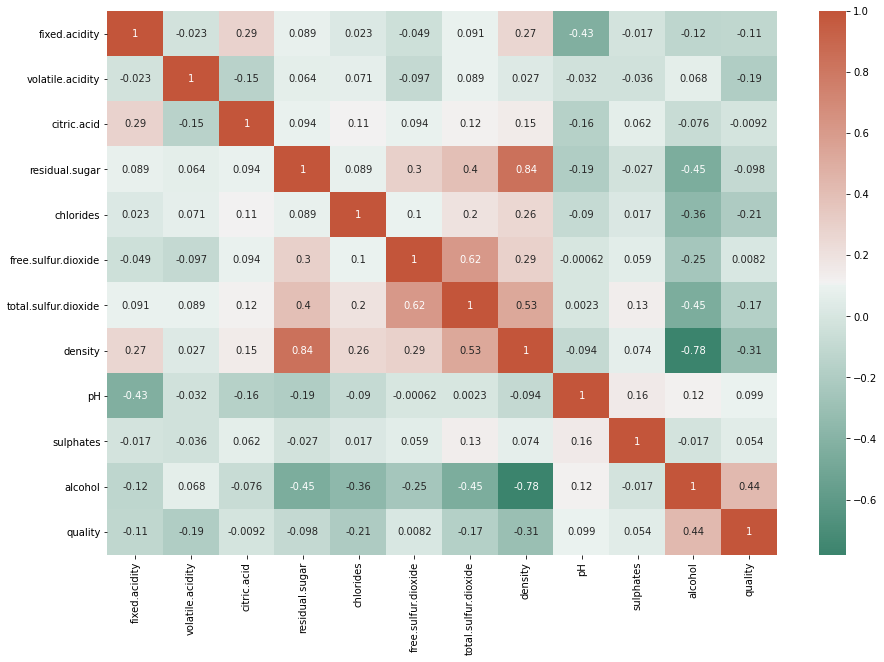

In [10]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(520, 20, as_cmap=True))

**Displaying histogram plots for every numerical column in the dataset**

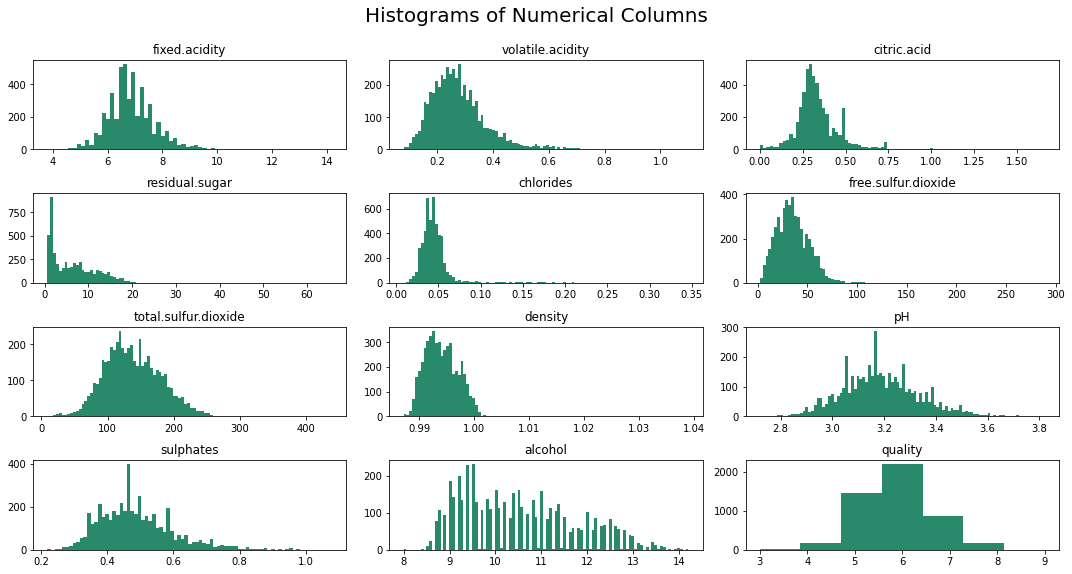

In [11]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df.iloc[:, i], bins=vals, color='#298a6b')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**Specifying classes in the dataset i.e. Good wine or bad wine based on its quality measure**

In [12]:
df['fineQuality'] = [1 if x >= 7 else 0 for x in df['quality']]
X = df.drop(['quality','fineQuality'], axis = 1)
y = df['fineQuality']

**Displaying distribution of both classes using two different colors**

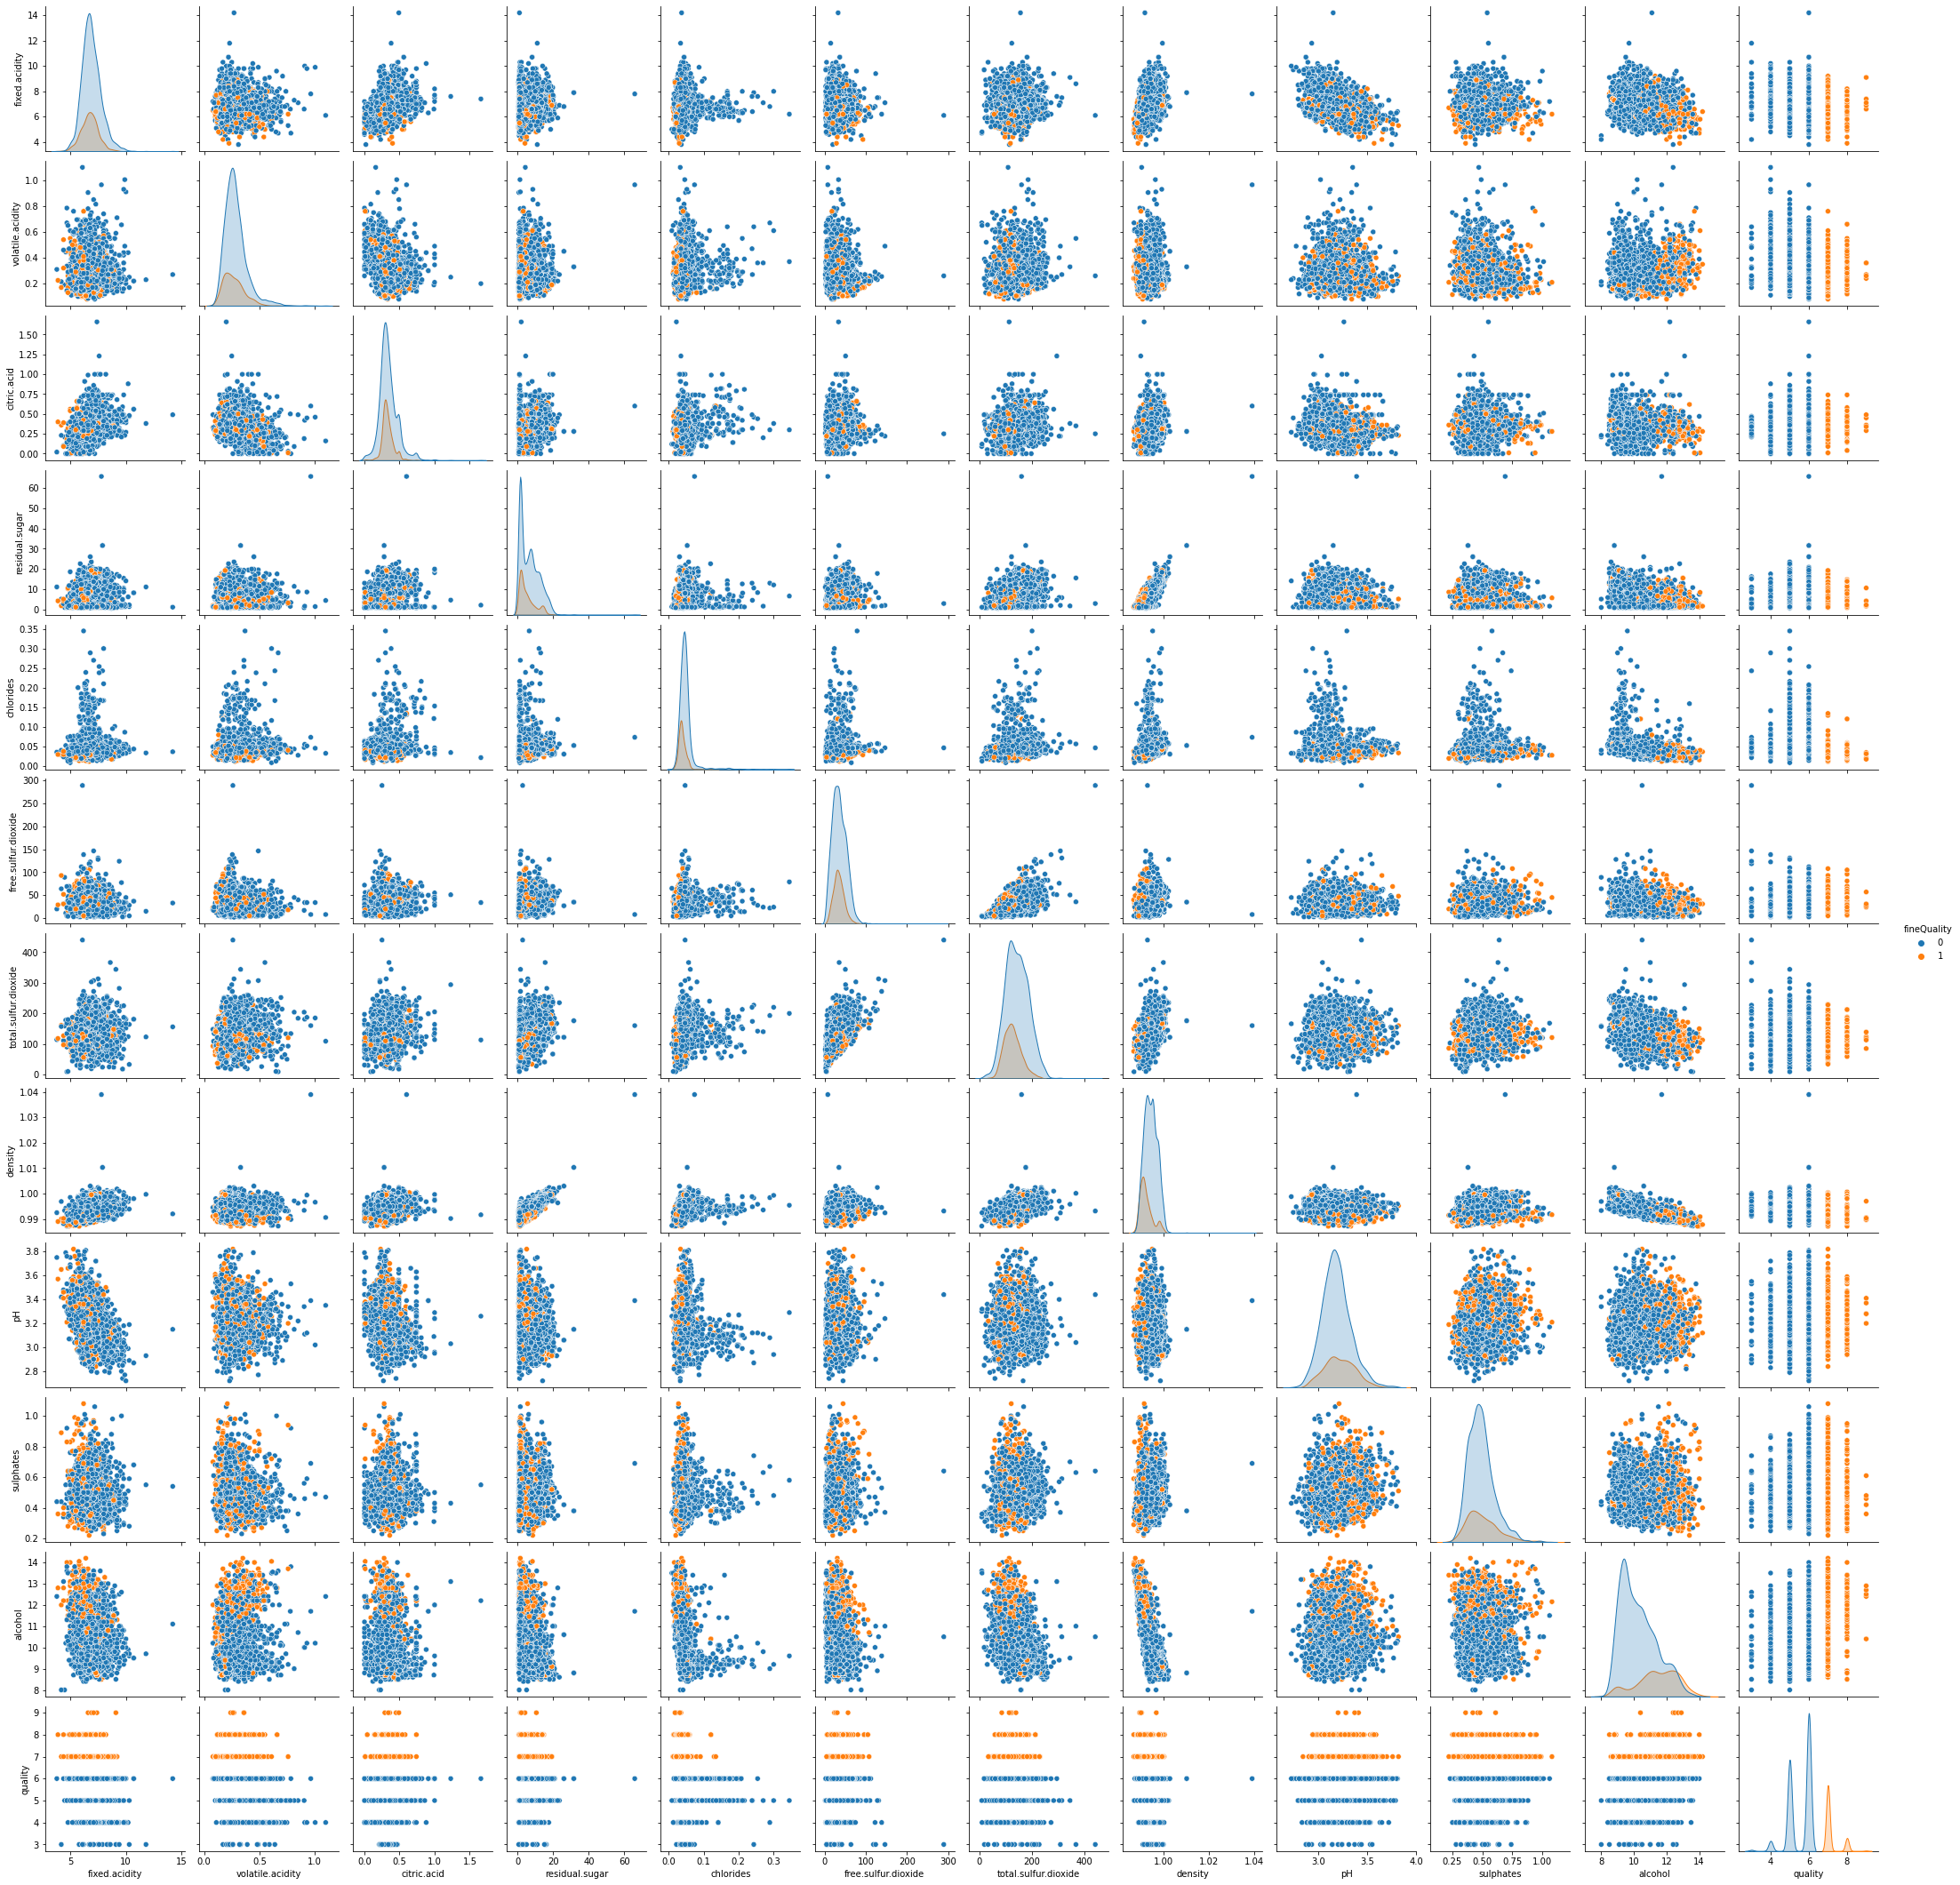

In [13]:
sns.pairplot(df, hue="fineQuality")

**Checking balance of classes in Dataset: we can clearly see that the dataset is imbalance**

In [14]:
df['fineQuality'].value_counts()

0    3838
1    1060
Name: fineQuality, dtype: int64

**Transforming features to solve problem of imbalance classification**

In [15]:
X_features = X
X = StandardScaler().fit_transform(X)

Splitting the dataset into 75% training and 25% testing

In [39]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2000)

Fitting SUPPORT VECTOR MACHINE model on the processed data of wines

In [40]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Plotting Learning curve for our SUPPORT VECTOR MACHINE**

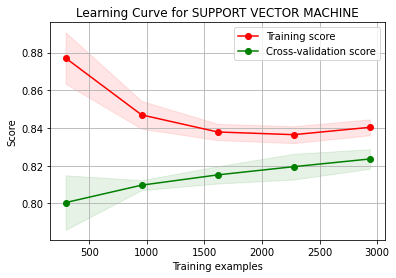

In [41]:
#   plotting learning curve
skplt.estimators.plot_learning_curve(clf, X_train, y_train)
plt.title("Learning Curve for SUPPORT VECTOR MACHINE")
plt.show()

**After training SVM model on training data, Now making predictions on both training and testing data**

In [42]:
predTest = clf.predict(X_test)
predTrain = clf.predict(X_train)

**Now calculating accuracy on both training and testing data**

In [43]:
print("Training Accuracy: ", accuracy_score(y_train, predTrain)*100, "%")
print("Testing Accuracy: ", accuracy_score(y_test, predTest)*100, "%")

Training Accuracy:  84.31799618840185 %
Testing Accuracy:  83.10204081632652 %


**Plotting Confusion matrix of Support Vector Machine Model**

[[932  32]
 [175  86]] 





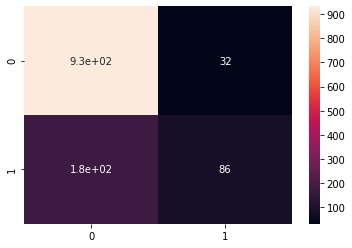

In [44]:
cm = confusion_matrix(y_test, predTest)
print(cm, "\n\n\n")
sns.heatmap(cm, annot=True)

**Plotting Classification Report on Support Vector Machine Model**

In [45]:
df = pd.DataFrame(classification_report(clf.predict(X_test), 
                                        y_test, digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.966805,0.841915,0.900048,1107
1,0.329502,0.728814,0.453826,118
accuracy,0.831020,0.831020,0.831020,0
macro avg,0.648153,0.785364,0.676937,1225
weighted avg,0.905416,0.831020,0.857065,1225
